In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [93]:
passangers_data = pd.read_csv('data/gender_submission.csv')
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

titanic = pd.concat([train_data, test_data], sort=False)
original_rownum = titanic.shape[0]

In [94]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

In [95]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [96]:
# Replace cabine number with 'unknown'
# Replace Embarked with mode of the column
# Replace Fare with mean of the column

titanic.fillna({'Cabin': 'unknown',
                'Embarked': titanic.Embarked.mode()[0],
                'Fare': titanic.Fare.mean()}, 
               inplace=True)

In [97]:
titanic['Role'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [98]:
role_map = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [99]:
titanic['Role'] = titanic.Role.map(role_map)

In [100]:
titanic['Role'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [101]:
titanic.groupby(['Role', 'Sex']).Age.mean()

Role     Sex   
Master   female    28.625000
         male      11.748367
Miss     female    24.052778
         male      30.656250
Mr       female    29.329701
         male      31.858425
Mrs      female    34.527132
         male      29.649310
Officer  female    36.000000
         male      42.850000
Royalty  female    40.500000
         male      44.250000
Name: Age, dtype: float64

In [102]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age

In [103]:
titanic.Age = titanic[['Role', 'Sex', 'Age']].apply(newage, axis=1)


In [104]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Role
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,Mr


In [105]:
titanic.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Role             0
dtype: int64

In [106]:
assert original_rownum == titanic.shape[0], 'Размерности датафреймов не совпадают!'

## Data analyze

In [108]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Role
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,Mr


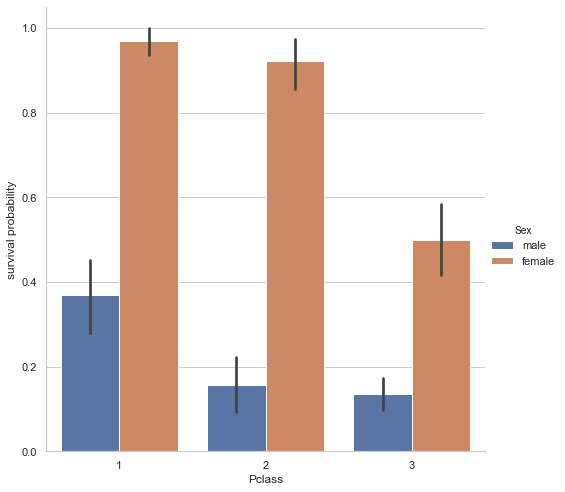

In [109]:
sns.set(style="whitegrid")

sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic,
                height=7, kind="bar").set_ylabels("survival probability")


In [110]:
titanic.groupby(['Survived', 'Sex'], as_index=False).PassengerId.count().rename(columns={'PassengerId': 'Survived Num'})

,Survived,Sex,Survived Num
0,0.0,female,81
1,0.0,male,468
2,1.0,female,233
3,1.0,male,109


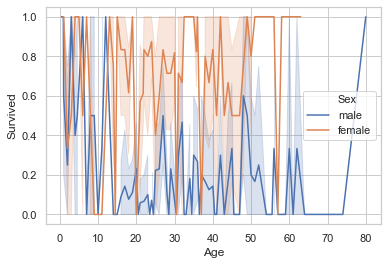

In [111]:
sns.lineplot(y='Survived', x='Age', data=titanic, hue='Sex')

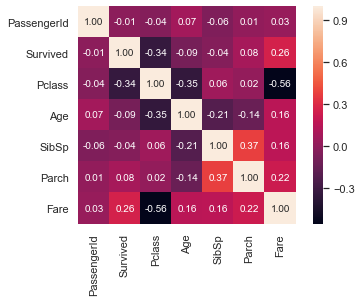

In [112]:
titanic_corelations = titanic.corr()
sns.heatmap(titanic_corelations, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10},
            yticklabels=titanic_corelations.columns.values, 
            xticklabels=titanic_corelations.columns.values)

From the above matrix, it is evident that no feature has a high correlation with the class label - Survived.

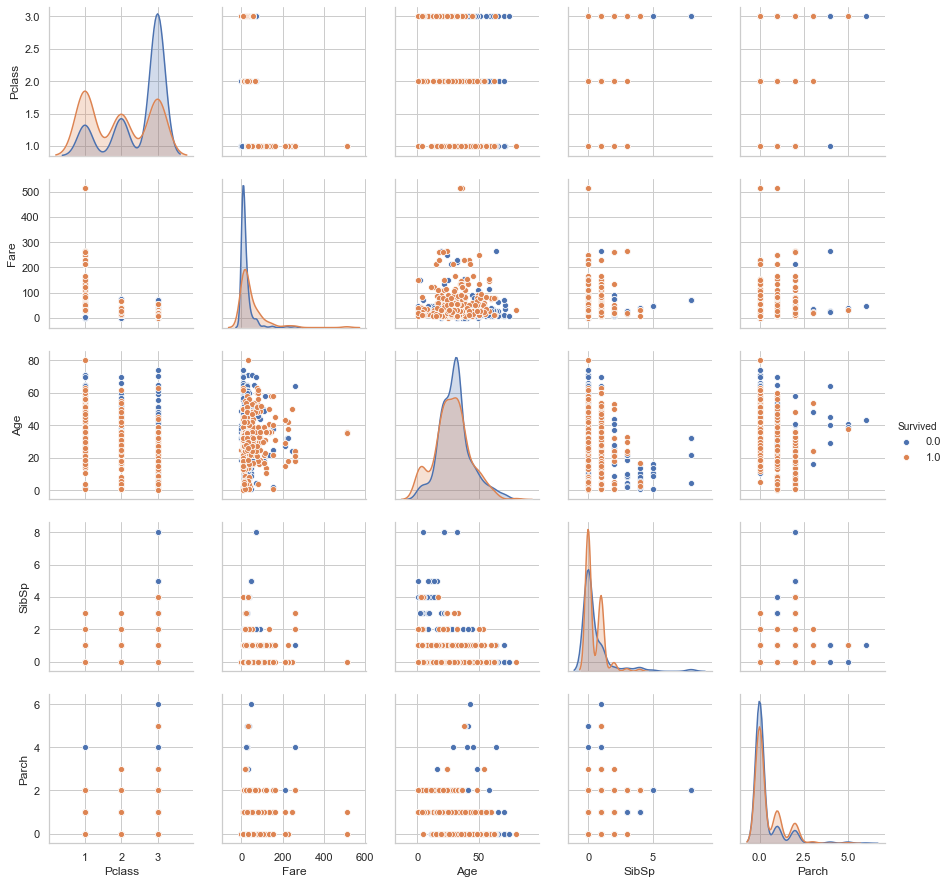

In [113]:
sns.pairplot(titanic.loc[:, ['Pclass', 'Fare', 'Age', 'SibSp', 'Parch', 'Survived']],
            hue='Survived', vars=['Pclass', 'Fare', 'Age', 'SibSp', 'Parch'])

In [114]:
assert original_rownum == titanic.shape[0], 'Размерности датафреймов не совпадают!'

## Predprocessing & Feature Engineering

Feature - Name, a good strategy can be to take the count of number of characters
Feature - Cabin, a good strategy will be to make a new column HasCabin.
Feature - Ticket has no significance, therfore it can be dropped.
Feature - Sex & Embarked, we can perform one hot encoding.
Creating 2 new features - FamilySize (Parch + SibSp) & IsAlone.

In [115]:
titanic['Name1'] = titanic.Name.apply(len)

In [116]:
titanic['HasCabin'] = (~(titanic['Cabin'] == 'unknown')).astype(int)

In [117]:
titanic['FamilySize'] = titanic.SibSp + titanic.Parch

In [118]:
titanic['IsAlone'] = (titanic.FamilySize == 0).astype(int)

In [119]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [120]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Role,Name1,HasCabin,FamilySize,IsAlone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,23,0,1,0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,51,1,1,0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,22,0,0,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,44,1,1,0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,24,0,0,1


In [121]:
titanic = pd.get_dummies(titanic)

In [122]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name1,HasCabin,FamilySize,IsAlone,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Role_Master,Role_Miss,Role_Mr,Role_Mrs,Role_Officer,Role_Royalty
0,0.0,3,22.0,1,0,7.2500,23,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1,1.0,1,38.0,1,0,71.2833,51,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,22,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,44,1,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0.0,3,35.0,0,0,8.0500,24,0,0,1,...,1,0,0,1,0,0,1,0,0,0


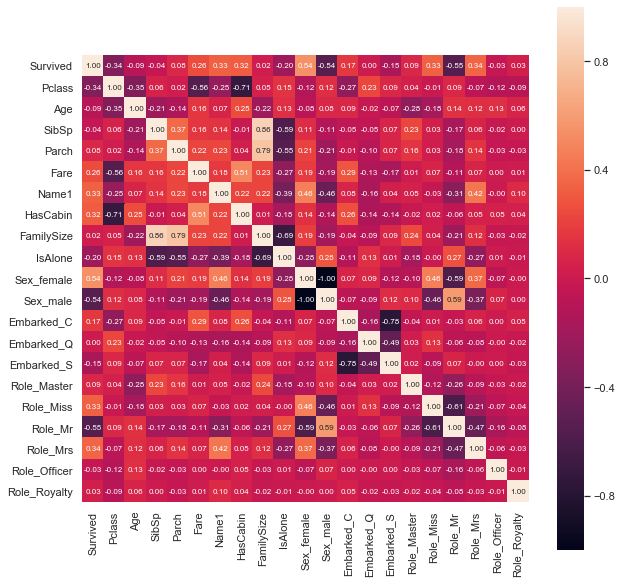

In [123]:
titanic_corelations2 = titanic.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(titanic_corelations2, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 8}, 
            yticklabels=titanic_corelations2.columns.values, 
            xticklabels=titanic_corelations2.columns.values)

Here we can see that the engineered features - role, Name1, HasCabin, IsAlone have a high correlation with the class label Survived.

In [124]:
assert original_rownum == titanic.shape[0], 'Размерности датафреймов не совпадают!'

## Applying Machine Learning Models

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [125]:
train_data_rownum = train_data.shape[0]
train_data = titanic[:train_data_rownum]
test_data = titanic[train_data_rownum:]

In [131]:
train_data.Survived = train_data.Survived.astype(int)

In [132]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name1,HasCabin,FamilySize,IsAlone,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Role_Master,Role_Miss,Role_Mr,Role_Mrs,Role_Officer,Role_Royalty
0,0,3,22.0,1,0,7.2500,23,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,51,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,22,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,44,1,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,24,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [129]:
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name1,HasCabin,FamilySize,IsAlone,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Role_Master,Role_Miss,Role_Mr,Role_Mrs,Role_Officer,Role_Royalty
0,NaN,3,34.5,0,0,7.8292,16,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,NaN,3,47.0,1,0,7.0000,32,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,NaN,2,62.0,0,0,9.6875,25,0,0,1,...,1,0,1,0,0,1,0,0,0,0
3,NaN,3,27.0,0,0,8.6625,16,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,NaN,3,22.0,1,1,12.2875,44,0,2,0,...,0,0,0,1,0,0,1,0,0,0


In [135]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('Survived', axis=1)

In [193]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=2)

In [194]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [195]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [196]:
clf.score(X_train, y_train)

0.9663865546218487

In [197]:
clf.score(X_valid, y_valid)

0.8305084745762712